# Segmentación de tejido pulmonar


***
El presente notebook contiene una explicación detallada del proceso de segmentación de tejido pulmonar en imágenes de CT partir de archivos DICOM.

## Objetivos

```
- Guardar imágenes de un examen de CT en un formato accesible y de fácil manejo en python.
- Segmentar tejido pulmonar en imágenes de Tomografía Computarizada de tórax.
- Implementar funciones que permitan automatizar procesos y eliminar código innecesario. 
- Graficar las imágenes segmentadas.

```

## Introducción

A continuación se presenta el flujo de trabajo para la segmentación pulmonar en imágenes DICOM de TC de tórax en diferentes planos anatómicos, este flujo de trabajo muestra la estructura que tiene el presente notebook.

<img src="imagenes/Flujo_segmentacion.png"> 
 

>**Nota**: Las funciones que se diseñaron para automatizar ciertos procesos y para que  el presente notebook sea mas interactivo y fácil de entender,  fueron guardadas en el archivo imprimir_imagen.py y son importadas al notebook como **`imp`**.

## Librerías y módulos


Las bibliotecas que son necesarias para este proyecto son las siguientes:


- *pydicom* para leer los atributos de archivos DICOM.
- *numpy* para la manipulación de las matrices.
- *matplotlib* para gráficar datos.
- *imprimir_imagen* para manipular imágenes de CT de archivos dicom.
- *scipy.ndimage* para el procesamiento de imágenes multidimensionales.
- *skimage* para procesamiento de imágenes
- *os* para manipulación de directorios

In [1]:
import pydicom
import numpy as np
import matplotlib.pylab as plt
import imprimir_imagen as imp
import scipy.ndimage as ndimage
import os

from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Selección de exámenes

Para realizar la segmentación de tejido pulmonar se utilizará los examenes que comprendan la zona toráxica.

## Lectura de la imagen
La lectura de los datos de un archivo DICOM para la segmentación sigue el mismo proceso que se realizó para la visualización, así mismo se extrae algunos atributos que son necesarios para la reconstrucción de la imagen, todo este proceso lo puede encontrar en el notebook de jupyter `Visualización de imágenes DICOM.ipynb`. En el archivo `imprimir_imagen` se diseñaron funciones que permiten realizar todo este proceso de una manera muy simplificada.


## Obtención, transformación de unidades y corrección de la matriz N × M × M
En esta sección se obtiene una matriz de N × M × M dimensiones producto de la lectura de la matriz de píxeles de cada uno de los archivos DICOM de un mismo examen y de su posterior apilamiento que llamamos matriz 3D, luego se realiza el cambio de unidades a Hounsfield y finalmente se realiza la corrección de píxeles,
de una manera similar a la que se realizó para el proceso de visualización.


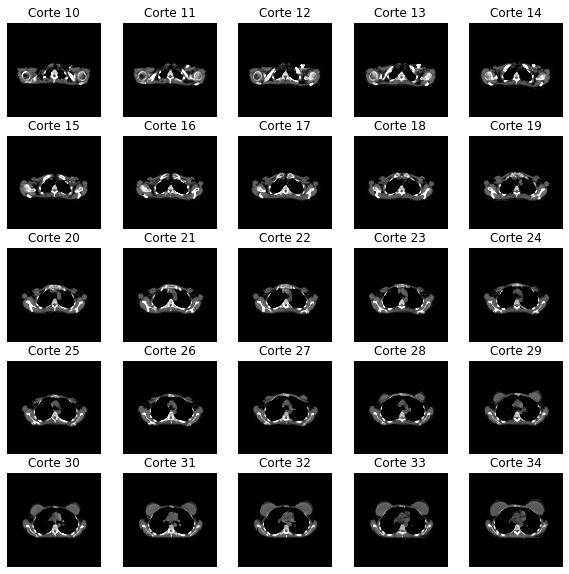

In [2]:
ruta = 'datos-torax-A/paciente3-A' # ruta de la imagen
imagen = imp.extrac_matrix(imp.load_scan(ruta)) # cargamos las imágenes y extraemos la matriz
imagen =  imp.remov_cama(imagen, 370, 512) # funcion que remueve la camilla
imp.muestra_datos(imagen) # visualización de los datos

## Almacenamiento de la matriz

 La matriz de píxeles será almacenada en el formato NPY, un tipo de archivo de matriz NumPy creado por el paquete de software Python con la biblioteca NumPy.

In [3]:
try:
    os.mkdir('arrays') # crea una carpeta en la misma carpeta donde esta el notebook jupyter
except:
    print("La carpeta ya existe")
ruta_arrays = 'arrays/'
np.save(ruta_arrays + "arrays_{}.npy" .format('paciente3-A'), imagen) # almacenamos en NPY
imagen_procesada = np.load(ruta_arrays+'arrays_{}.npy'.format('paciente3-A')) # cargamos la matriz    

La carpeta ya existe


## Crear la imagen de gradiente

El proceso de segmentación que se utiliza se basa principalmente en el desarrolo descrito en el paper 
<a href="https://www.semanticscholar.org/paper/Automatic-lung-segmentation-in-CT-images-using-Shojaii-Alirezaie/03002d15a3af26c6d961286d4e039787622a8fbe">Automatic lung segmentation in ct images using watershed transform</a>. Por lo que iniciamos encontrando la imagen de gradiente mediante el operador de Sobel.

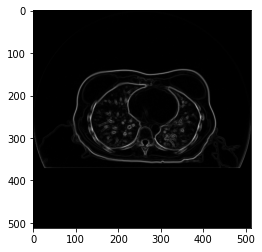

In [12]:
image= imagen[45]
# aplicamos el operador de sobel en X y Y
sobel_dx = ndimage.sobel(image, 1)
sobel_dy = ndimage.sobel(image, 0)
sobel_gradient = np.hypot(sobel_dx, sobel_dy) # calculamos el norma
sobel_gradient *= 255.0 / np.max(sobel_gradient) # normalizamos
plt.imshow(sobel_gradient, cmap='gray')
plt.show()

## Generación del Marcador interno

Para utilizar la segmentación de Watershed basada en marcadores, necesitamos identificar dos marcadores. Un marcador interno, que definitivamente es tejido pulmonar y un marcador externo, que definitivamente está fuera de la región de interes que en este caso es los pulmones. Comenzamos creando el marcador interno mediante el umbral de la imagen y eliminando todas las regiones menos las mas grandes.

 El marcador externo se crea mediante la dilatación morfológica del marcador interno con 2 iteraciones diferentes y restando los resultados. Se crea un marcador de cuenca superponiendo los 2 marcadores con diferentes valores de escala de grises.

[Top of Page](#top)
<img style="float: right;" src="https://fisica.epn.edu.ec/images/LOGO_fisica-01-01.png" alt="Space Telescope Logo" width="300px"/> 

In [7]:
np.hypot([1,2],[3,4])

array([3.16227766, 4.47213595])

In [8]:
1+3**2

10

In [11]:
import math
math.sqrt(10)

3.1622776601683795